In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [2]:
import pandas as pd
import io

# Automatically uploaded file ka naam lelo
filename = list(uploaded.keys())[0]

# File read karo
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# First 5 rows dekho
df.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Features (X) aur Target (y) alag karo
X = df.drop('target', axis=1)
y = df['target']


In [5]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Prediction karo
y_pred = dtree.predict(X_test)

# Accuracy dekho
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.9853658536585366


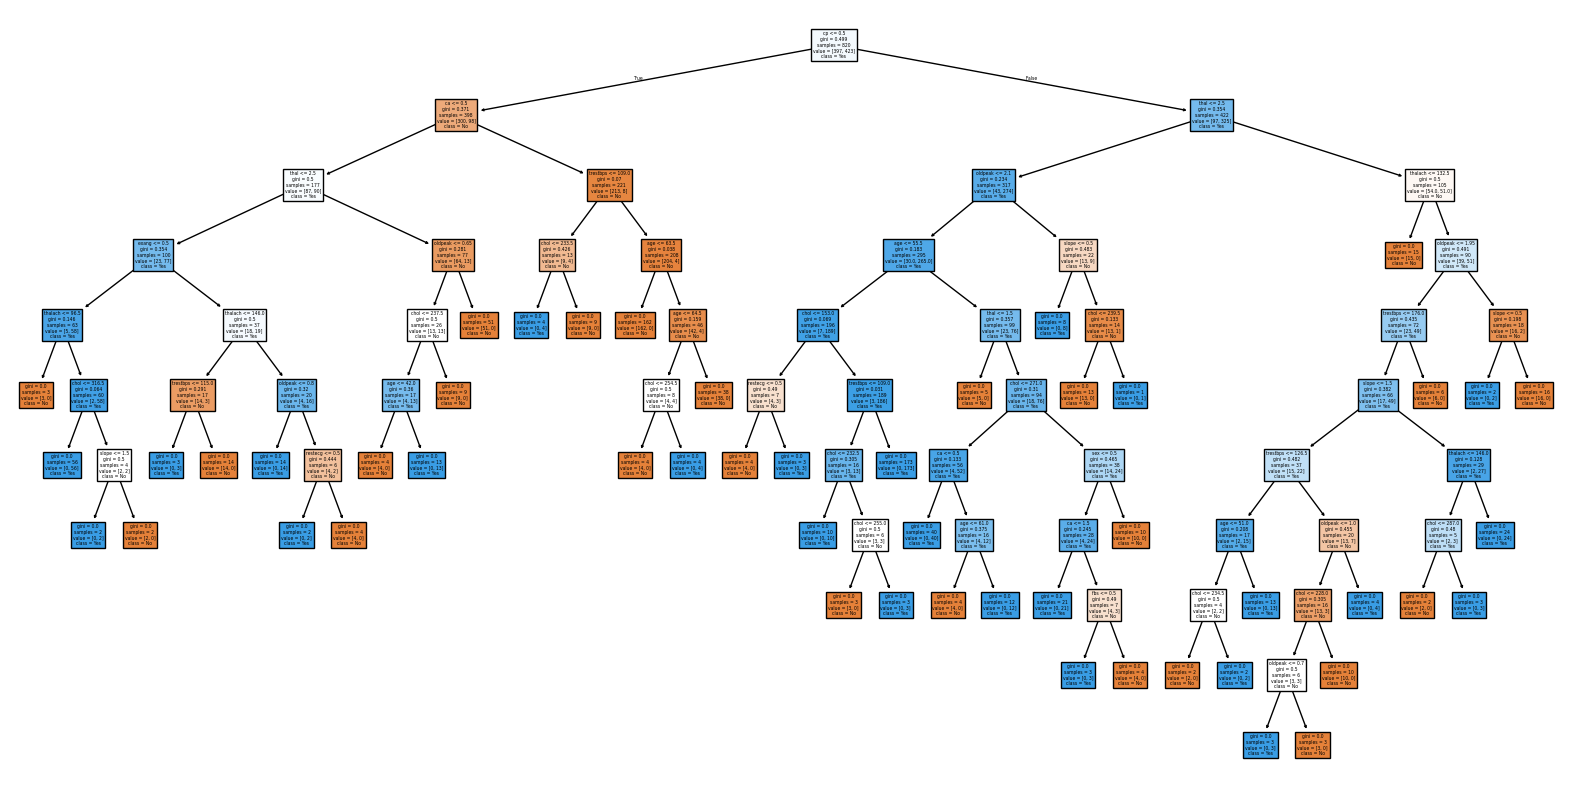

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()


In [8]:
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)

pruned_pred = pruned_tree.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, pruned_pred))


Pruned Tree Accuracy: 0.7804878048780488


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9853658536585366


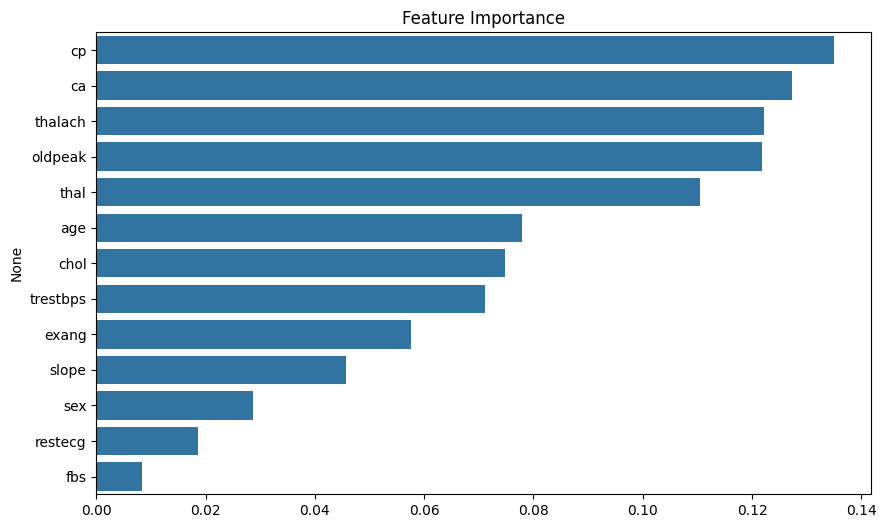

In [10]:
import seaborn as sns
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score

dtree_cv = cross_val_score(dtree, X, y, cv=5).mean()
rf_cv = cross_val_score(rf, X, y, cv=5).mean()

print("Decision Tree CV Accuracy:", dtree_cv)
print("Random Forest CV Accuracy:", rf_cv)


Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073
